# Kaggle Challenge : Digit Recognizer
Used resources :
- https://www.kaggle.com/c/digit-recognizer
- https://www.youtube.com/watch?v=aZsZrkIgan0
- https://www.codingame.com/playgrounds/37409/handwritten-digit-recognition-using-scikit-learn
- https://scikit-learn.org/stable/modules/classes.html

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

### Read, randomize & split data

In [2]:
#Read the data
fullDataSet = pd.read_csv("train.csv")
fullDataSetMatrix = fullDataSet.as_matrix()
#Randomize the data
random.shuffle(fullDataSetMatrix)
#Split the data
precentTrainData = 90 #Change this value for more or less train data
howManyTrain = int((len(fullDataSetMatrix)/100)*precentTrainData)
#Make train Data Set
trainDataSet = fullDataSetMatrix[0:howManyTrain, 1:]
trainlabels = fullDataSetMatrix[0:howManyTrain, 0]
#Make test Data Set
testDataSet = fullDataSetMatrix[howManyTrain:, 1:]
testlabels = fullDataSetMatrix[howManyTrain:, 0]

c:\users\miked\pycharmprojects\werkstukai\venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Train a model with Decision Tree

In [3]:
dtc = DecisionTreeClassifier()
dtc.fit(trainDataSet,trainlabels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Train a model with K Neighbors

In [4]:
k = 2
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(trainDataSet,trainlabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

### Train a model with Random Forest

In [5]:
d = 3
r = 1
rfc = RandomForestClassifier(max_depth=d, random_state=r)
rfc.fit(trainDataSet,trainlabels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

### Train a model with Support Vector Classification

In [6]:
svc = LinearSVC()
svc.fit(trainDataSet,trainlabels)

c:\users\miked\pycharmprojects\werkstukai\venv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

### Test the models & give accuracy with Decision Tree

In [7]:
preDTC = dtc.predict(testDataSet)
print("Accuracy with Decision Tree: ", accuracy_score(testlabels, preDTC))

Accuracy with Decision Tree:  0.9052380952380953


### Test the models & give accuracy with K Neighbors

In [8]:
preKNC = knc.predict(testDataSet)
print("Accuracy with K Neighbors: ", accuracy_score(testlabels, preKNC))

Accuracy with K Neighbors:  0.9661904761904762


### Test the models & give accuracy with Random Forest

In [9]:
preRFC = rfc.predict(testDataSet)
print("Accuracy with Random Forest: ", accuracy_score(testlabels, preRFC))

Accuracy with Random Forest:  0.7247619047619047


### Test the models & give accuracy with Support Vector Classification

In [10]:
preSVC = svc.predict(testDataSet)
print("Accuracy with Support Vector Classification: ", accuracy_score(testlabels, preSVC))

Accuracy with Support Vector Classification:  0.9014285714285715


### Show a random number from data with predictions

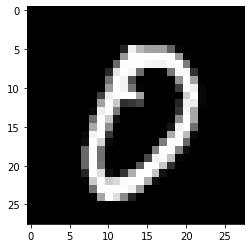

Value of image is : 0
Predicted value with DecisionTreeClassifier : 0
Predicted value with KNeighborsClassifier : 0
Predicted value with KNeighborsClassifier : 0
Predicted value with LinearSVC : 0


In [11]:
randomNumData = testDataSet[0]
randomNumData.shape=(28,28)
plt.imshow(randomNumData, cmap='gray')
plt.show()
print("Value of image is : " + str(testlabels[0]))
#print(dtc.predict( [trainDataSet[randomNum]] ))
print("Predicted value with DecisionTreeClassifier :" , preDTC[0])
print("Predicted value with KNeighborsClassifier :" , preKNC[0])
print("Predicted value with KNeighborsClassifier :" , preRFC[0])
print("Predicted value with LinearSVC :" , preSVC[0])


# TestResults

## DecisionTree
#1: 0.7554232804232804
#2: 0.7503439153439153
#3: 0.7374338624338624
#4: 0.9052380952380953
#5: 

## K Neighbors
#1: 0.8987566137566138 (n_neighbors=6)
#2: 0.906058201058201 (n_neighbors=3)
#3: 0.9088888888888889 (n_neighbors=2)
#4: 0.9661904761904762 (n_neighbors=2)
#5: 

## Random Forest
#1: 0.5647089947089947 (max_depth=2, random_state=0)
#2: 0.7196296296296296 (max_depth=3, random_state=0)
#3: 0.7637566137566137 (max_depth=3, random_state=1)
#4: 0.7247619047619047 (max_depth=3, random_state=1)
#5: 

## Support Vector Classification
#1: 0.8391534391534392
#2: 0.838042328042328
#3: 0.8453174603174604
#4: 0.9014285714285715
#5: 

### Thanks to a typo in the percentage train/test data are the first 3 test result with 10% train data and 90% test data, 
### test result 4 and up are 90% train & 10% test data